[*********************100%***********************]  1 of 1 completed


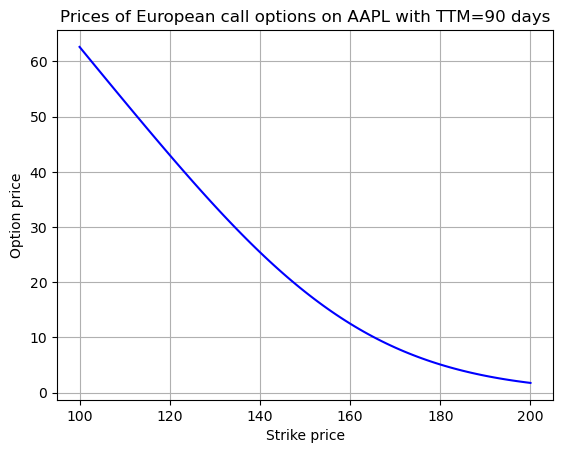

In [23]:
# Importing libs

import math
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def european_option_price(S, K, r, sigma, t, option_type):
    
    T = t / 365.0
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    if option_type == "call":
        option_price = S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)
    elif option_type == "put":
        option_price = K * math.exp(-r * T) * norm_cdf(-d2) - S * norm_cdf(-d1)
    else:
        raise ValueError("Invalid option type")
    return option_price

# Calculating CDF of normal dist. PDF

def norm_cdf(x):
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

# Setting parameters

symbol = "AAPL"
start_date = "2022-03-31"
end_date = "2023-03-31"
time_to_expiration_days = 90
risk_free_rate = 0.01

# Download data
data = yf.download(symbol, start=start_date, end=end_date)

# Daily returns
daily_returns = data["Adj Close"].pct_change()

# Calculate volatility 
sigma = daily_returns.std() * math.sqrt(252)

# Latest price
S = data["Adj Close"].iloc[-1]

# Define a range of strike prices to consider
strike_prices = np.linspace(100, 200, 101)

# Calculate option prices
call_option_prices = [european_option_price(S, K, risk_free_rate, sigma, time_to_expiration_days, "call") for K in strike_prices]

# Plot the prices of the options as a function of the strike prices
plt.plot(strike_prices, call_option_prices, color="blue")
plt.grid()
plt.xlabel("Strike price")
plt.ylabel("Option price")
plt.title(f"Prices of European call options on {symbol} with TTM={time_to_expiration_days} days")
plt.show()